In [324]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy.stats import skew
from sklearn.preprocessing import PowerTransformer, StandardScaler

In [325]:
df = pd.read_csv("communities.data", header=None, na_values='?')
print("Shape of dataset:", df.shape)
display(df.head())

Shape of dataset: (1994, 128)


,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


In [326]:
col = [
    "state", "county", "community", "communityname", "fold",
    "population", "householdsize", "racepctblack", "racePctWhite", "racePctAsian", "racePctHisp",
    "agePct12t21", "agePct12t29", "agePct16t24", "agePct65up",
    "numbUrban", "pctUrban", "medIncome", "pctWWage", "pctWFarmSelf", "pctWInvInc",
    "pctWSocSec", "pctWPubAsst", "pctWRetire", "medFamInc", "perCapInc",
    "whitePerCap", "blackPerCap", "indianPerCap", "AsianPerCap", "OtherPerCap", "HispPerCap",
    "NumUnderPov", "PctPopUnderPov", "PctLess9thGrade", "PctNotHSGrad", "PctBSorMore",
    "PctUnemployed", "PctEmploy", "PctEmplManu", "PctEmplProfServ", "PctOccupManu",
    "PctOccupMgmtProf", "MalePctDivorce", "MalePctNevMarr", "FemalePctDiv", "TotalPctDiv",
    "PersPerFam", "PctFam2Par", "PctKids2Par", "PctYoungKids2Par", "PctTeen2Par",
    "PctWorkMomYoungKids", "PctWorkMom", "NumIlleg", "PctIlleg",
    "NumImmig", "PctImmigRecent", "PctImmigRec5", "PctImmigRec8", "PctImmigRec10",
    "PctRecentImmig", "PctRecImmig5", "PctRecImmig8", "PctRecImmig10",
    "PctSpeakEnglOnly", "PctNotSpeakEnglWell", "PctLargHouseFam", "PctLargHouseOccup",
    "PersPerOccupHous", "PersPerOwnOccHous", "PersPerRentOccHous",
    "PctPersOwnOccup", "PctPersDenseHous", "PctHousLess3BR", "MedNumBR",
    "HousVacant", "PctHousOccup", "PctHousOwnOcc", "PctVacantBoarded", "PctVacMore6Mos",
    "MedYrHousBuilt", "PctHousNoPhone", "PctWOFullPlumb", "OwnOccLowQuart",
    "OwnOccMedVal", "OwnOccHiQuart", "RentLowQ", "RentMedian", "RentHighQ",
    "MedRent", "MedRentPctHousInc", "MedOwnCostPctInc", "MedOwnCostPctIncNoMtg",
    "NumInShelters", "NumStreet", "PctForeignBorn", "PctBornSameState", "PctSameHouse85",
    "PctSameCity85", "PctSameState85", "LemasSwornFT", "LemasSwFTPerPop",
    "LemasSwFTFieldOps", "LemasSwFTFieldPerPop", "LemasTotalReq", "LemasTotReqPerPop",
    "PolicReqPerOffic", "PolicPerPop", "RacialMatchCommPol", "PctPolicWhite",
    "PctPolicBlack", "PctPolicHisp", "PctPolicAsian", "PctPolicMinor",
    "OfficAssgnDrugUnits", "NumKindsDrugsSeiz", "PolicAveOTWorked",
    "LandArea", "PopDens", "PctUsePubTrans", "PolicCars", "PolicOperBudg",
    "LemasPctPolicOnPatr", "LemasGangUnitDeploy", "LemasPctOfficDrugUn",
    "PolicBudgPerPop", "ViolentCrimesPerPop"
]

df=pd.read_csv("communities.data",names=col,na_values=["?"])
df.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


In [327]:
print("\nDataset Info:")
print(df.info())
print("\nMissing values:\n", df.isna().sum())
print(df.isnull().sum().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Columns: 128 entries, state to ViolentCrimesPerPop
dtypes: float64(125), int64(2), object(1)
memory usage: 1.9+ MB
None

Missing values:
 state                     0
county                 1174
community              1177
communityname             0
fold                      0
                       ... 
LemasPctPolicOnPatr    1675
LemasGangUnitDeploy    1675
LemasPctOfficDrugUn       0
PolicBudgPerPop        1675
ViolentCrimesPerPop       0
Length: 128, dtype: int64
39202


In [328]:
print(df.columns)
'ViolentCrimesPerPop' in df.columns

Index(['state', 'county', 'community', 'communityname', 'fold', 'population',
       'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian',
       ...
       'LandArea', 'PopDens', 'PctUsePubTrans', 'PolicCars', 'PolicOperBudg',
       'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'LemasPctOfficDrugUn',
       'PolicBudgPerPop', 'ViolentCrimesPerPop'],
      dtype='object', length=128)


True

In [329]:
df.dropna(inplace=True)
df.isnull().sum()

state                  0
county                 0
community              0
communityname          0
fold                   0
                      ..
LemasPctPolicOnPatr    0
LemasGangUnitDeploy    0
LemasPctOfficDrugUn    0
PolicBudgPerPop        0
ViolentCrimesPerPop    0
Length: 128, dtype: int64

In [330]:
df.duplicated().sum()

np.int64(0)

In [331]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df_num = df[num_cols].copy()

In [332]:
import pandas as pd
import numpy as np

Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1

outlier_mask = (df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))

total_outlier_values = outlier_mask.sum().sum()

rows_with_outlier = outlier_mask.any(axis=1).sum()

percent_rows_outlier = (rows_with_outlier / len(df_num)) * 100

print(f" Total outlier values (cells): {total_outlier_values}")
print(f" Rows containing at least one outlier: {rows_with_outlier} ({percent_rows_outlier:.2f}%)")
print(f" Total rows: {len(df_num)}")


 Total outlier values (cells): 629
 Rows containing at least one outlier: 98 (79.67%)
 Total rows: 123


In [333]:
df_capped = df.copy()
capped_count = 0

for col in df_capped.select_dtypes(include=[np.number]).columns:
    Q1 = df_capped[col].quantile(0.25)
    Q3 = df_capped[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    lower_capped = (df_capped[col] < lower_bound).sum()
    upper_capped = (df_capped[col] > upper_bound).sum()
    capped_count += lower_capped + upper_capped
    
    df_capped[col] = np.where(df_capped[col] < lower_bound, lower_bound,
                               np.where(df_capped[col] > upper_bound, upper_bound, df_capped[col]))

print(f"Total values capped: {capped_count}")


Total values capped: 629


In [334]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df_num = df[num_cols]

skewness = df_num.apply(lambda x: skew(x))
skewness = skewness.sort_values(ascending=False)
num_cols = df_num
skew_values = num_cols.skew()
print(skew_values)

state                 -0.372736
county                 2.864453
community             -0.070706
fold                   0.278590
population             2.320499
                         ...   
LemasPctPolicOnPatr   -1.631264
LemasGangUnitDeploy    1.027250
LemasPctOfficDrugUn    0.142594
PolicBudgPerPop        3.496950
ViolentCrimesPerPop    0.766458
Length: 127, dtype: float64


In [335]:
import pandas as pd
import numpy as np
from scipy.stats import skew

num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df_num = df[num_cols]

skewness = df_num.apply(lambda x: skew(x))
print("Original Skewness:\n", skewness.sort_values(ascending=False))

threshold = 0.5

skewed_cols = skewness[abs(skewness) > threshold].index
print("\nSkewed Columns:\n", skewed_cols.tolist())

for col in skewed_cols:
    
    if (df_num[col] <= 0).any():
        
        from sklearn.preprocessing import PowerTransformer
        pt = PowerTransformer(method='yeo-johnson')
        df_num[[col]] = pt.fit_transform(df_num[[col]])
    else:
        
        df_num[col] = np.log1p(df_num[col])

new_skewness = df_num.apply(lambda x: skew(x))
print("\nAfter Transformation:\n", new_skewness.sort_values(ascending=False))


Original Skewness:
 OfficAssgnDrugUnits    5.390842
LemasSwornFT           4.451344
PolicOperBudg          4.348335
NumStreet              4.157804
LandArea               3.920518
                         ...   
PctSpeakEnglOnly      -1.260962
PctPolicWhite         -1.390091
LemasPctPolicOnPatr   -1.611303
LemasSwFTFieldOps     -4.576238
pctUrban              -8.151779
Length: 127, dtype: float64

Skewed Columns:
 ['county', 'population', 'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'numbUrban', 'pctUrban', 'medIncome', 'pctWFarmSelf', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctLess9thGrade', 'PctBSorMore', 'PctUnemployed', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctNevMarr', 'PersPerFam', 'NumIlleg', 'NumImmig', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEnglOnly'

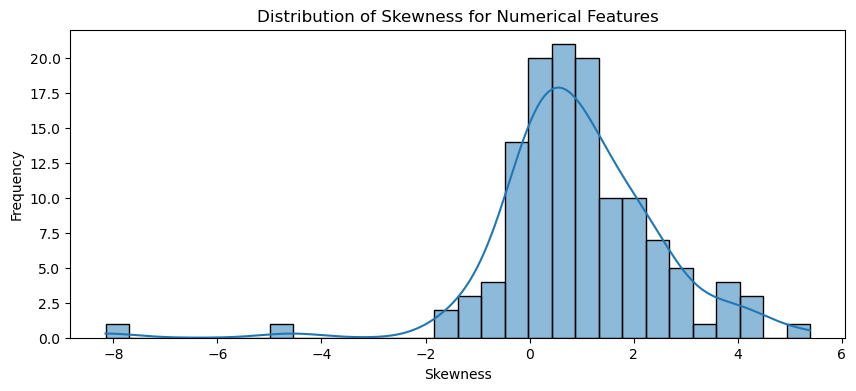

In [336]:
plt.figure(figsize=(10,4))
sns.histplot(skewness, bins=30, kde=True)
plt.title("Distribution of Skewness for Numerical Features")
plt.xlabel("Skewness")
plt.ylabel("Frequency")
plt.show()

In [337]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(numeric_cols)

Index(['state', 'county', 'community', 'fold', 'population', 'householdsize',
       'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp',
       ...
       'LandArea', 'PopDens', 'PctUsePubTrans', 'PolicCars', 'PolicOperBudg',
       'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'LemasPctOfficDrugUn',
       'PolicBudgPerPop', 'ViolentCrimesPerPop'],
      dtype='object', length=127)


In [338]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X=df[numeric_cols]
y=df["ViolentCrimesPerPop"]
scaler=StandardScaler()
X_scaler=scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaler)

pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df.head()


,PC1,PC2
0,-1.697874,-1.791341
1,1.401625,-4.712804
2,-0.245331,-4.665641
3,-4.498509,6.258201
4,3.513584,-2.391873


In [339]:
print("Explained Variance:", pca.explained_variance_)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total Variance Captured (2 components):", pca.explained_variance_ratio_.sum())

Explained Variance: [35.54200603 19.46502009]
Explained Variance Ratio: [0.27758304 0.15202179]
Total Variance Captured (2 components): 0.4296048387554292


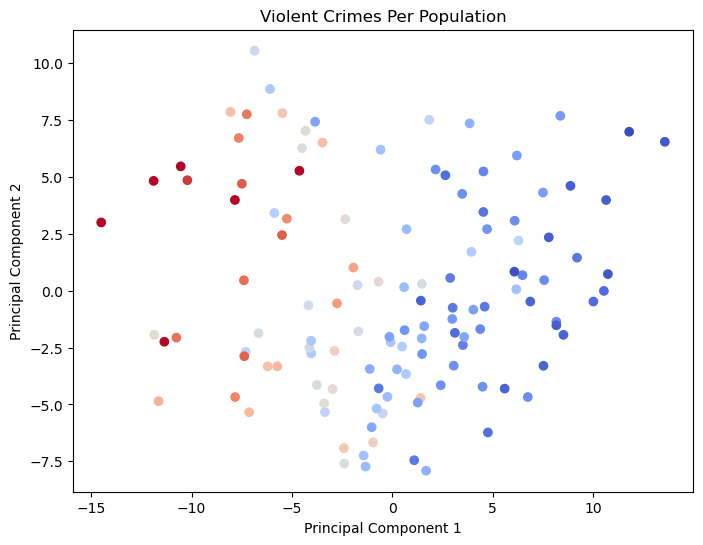

In [340]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=(df["ViolentCrimesPerPop"]), cmap='coolwarm')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Violent Crimes Per Population")
plt.show()

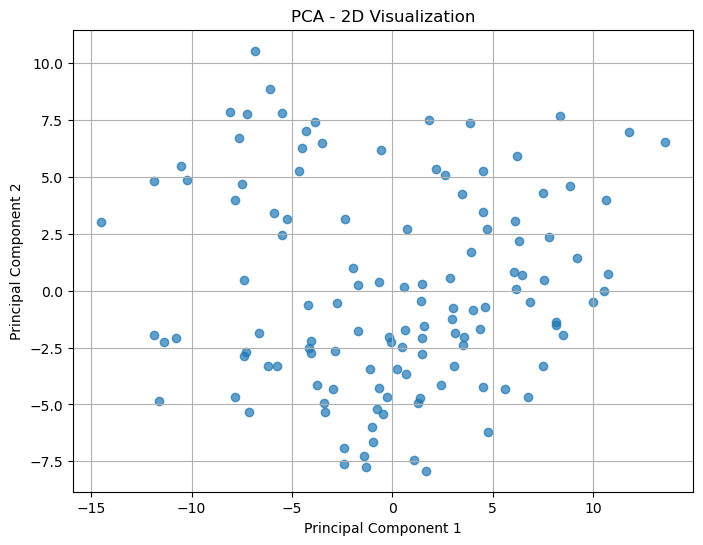

In [341]:
plt.figure(figsize=(8,6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7)
plt.title('PCA - 2D Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


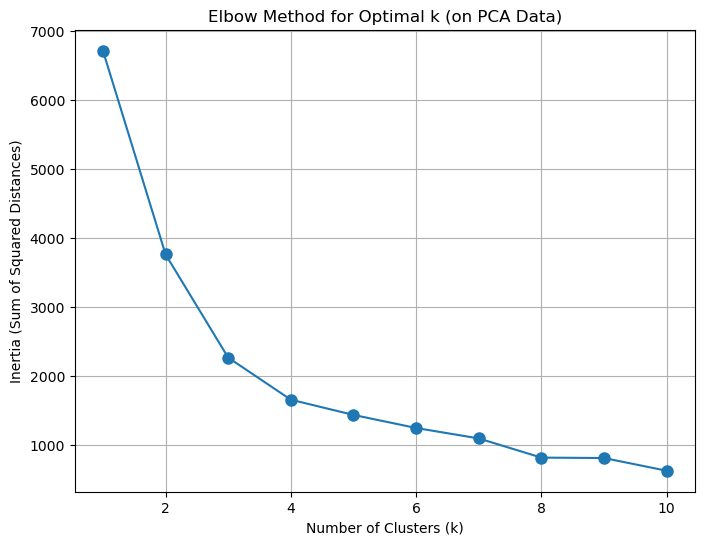

In [342]:
from sklearn.cluster import KMeans,AgglomerativeClustering
import warnings
warnings.filterwarnings("ignore")
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia ,marker='o',markersize=8)
plt.title('Elbow Method for Optimal k (on PCA Data)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.grid(True)
plt.show()

In [343]:
from sklearn.metrics import silhouette_score, adjusted_rand_score
kmeans = KMeans(n_clusters=2, random_state=42)
labels_km = kmeans.fit_predict(X_pca)

label_counts_km = pd.Series(labels_km).value_counts()
print("Cluster label counts:")
print(label_counts_km)

sil_score = silhouette_score(X_pca,labels_km)
print(f"Silhouette Score: {sil_score:.4f}")
ari_score = adjusted_rand_score(df['ViolentCrimesPerPop'], labels_km)
print(f"Adjusted Rand Index: {ari_score:.4f}")

Cluster label counts:
0    77
1    46
Name: count, dtype: int64
Silhouette Score: 0.3945
Adjusted Rand Index: 0.0154


In [344]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
results = []
a_grid = [2, 3, 4, 5]
for a in a_grid:
    agglo = AgglomerativeClustering(n_clusters=a)
    labs = agglo.fit_predict(X_pca)
    sil = silhouette_score(X_pca, labs)
    results.append(sil)
agglo = AgglomerativeClustering(n_clusters=4)
a_labels = agglo.fit_predict(X_pca)
a_sil_score = silhouette_score(X_pca, a_labels)
print(f"Hierarchical Clustering Silhouette Score: {a_sil_score}")

Hierarchical Clustering Silhouette Score: 0.36767413021133805


In [345]:
from sklearn.cluster import DBSCAN
dbscan_grid = np.arange(0.2, 4.0, 0.2)
results = []
for eps in dbscan_grid:
    dbscan = DBSCAN(eps=eps, min_samples=3)
    labs = dbscan.fit_predict(X_pca)
    valid = (labs != -1)
    if len(set(labs[valid])) > 1:
        sil = silhouette_score(X_pca[valid], labs[valid])
    else:
        sil = np.nan
    results.append(sil)
print(results)
dbscan = DBSCAN(eps=2.4, min_samples=3) 
labels_db = dbscan.fit_predict(X_pca)

label_counts_db = pd.Series(labels_db).value_counts()
print("Cluster label counts:")
print(label_counts_db)

mask = labels_db!= -1
if len(set(labels_db[mask])) > 1:
    print("Silhouette Score:", round(silhouette_score(X_pca[mask], labels_db[mask]), 2))

[nan, nan, np.float64(0.9175074775548536), np.float64(0.6599289219289992), np.float64(0.6050480441857178), np.float64(0.5028125514667451), np.float64(0.27591440903741293), np.float64(0.117415641220775), np.float64(0.3186337134219011), np.float64(0.28040679582132144), np.float64(0.34432511538887), np.float64(0.3316718209636081), np.float64(0.3619402982004743), np.float64(0.2836155153466244), np.float64(0.2836155153466244), np.float64(0.27231069687818205), np.float64(0.2665072432478512), nan, nan]
Cluster label counts:
 0    93
 1    16
-1     8
 2     3
 3     3
Name: count, dtype: int64
Silhouette Score: 0.33


In [346]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)

print("Score:", model.score(X_test, y_test))

Score: 0.7853298054665246
